Connect Google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing packages

In [ ]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt

Read the dataset

In [ ]:
# Read the data file
df = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Dropping irr relavant columns

In [ ]:
# Drop the specified columns
columns_to_drop = [
    "CLIENTNUM",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]
df = df.drop(columns=columns_to_drop)

# Display the top 7 rows of the cleaned dataset
df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Data Visualizations

<ipython-input-7-e7aa3d38be29>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-7-e7aa3d38be29>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-7-e7aa3d38be29>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-7-e7aa3d38be29>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


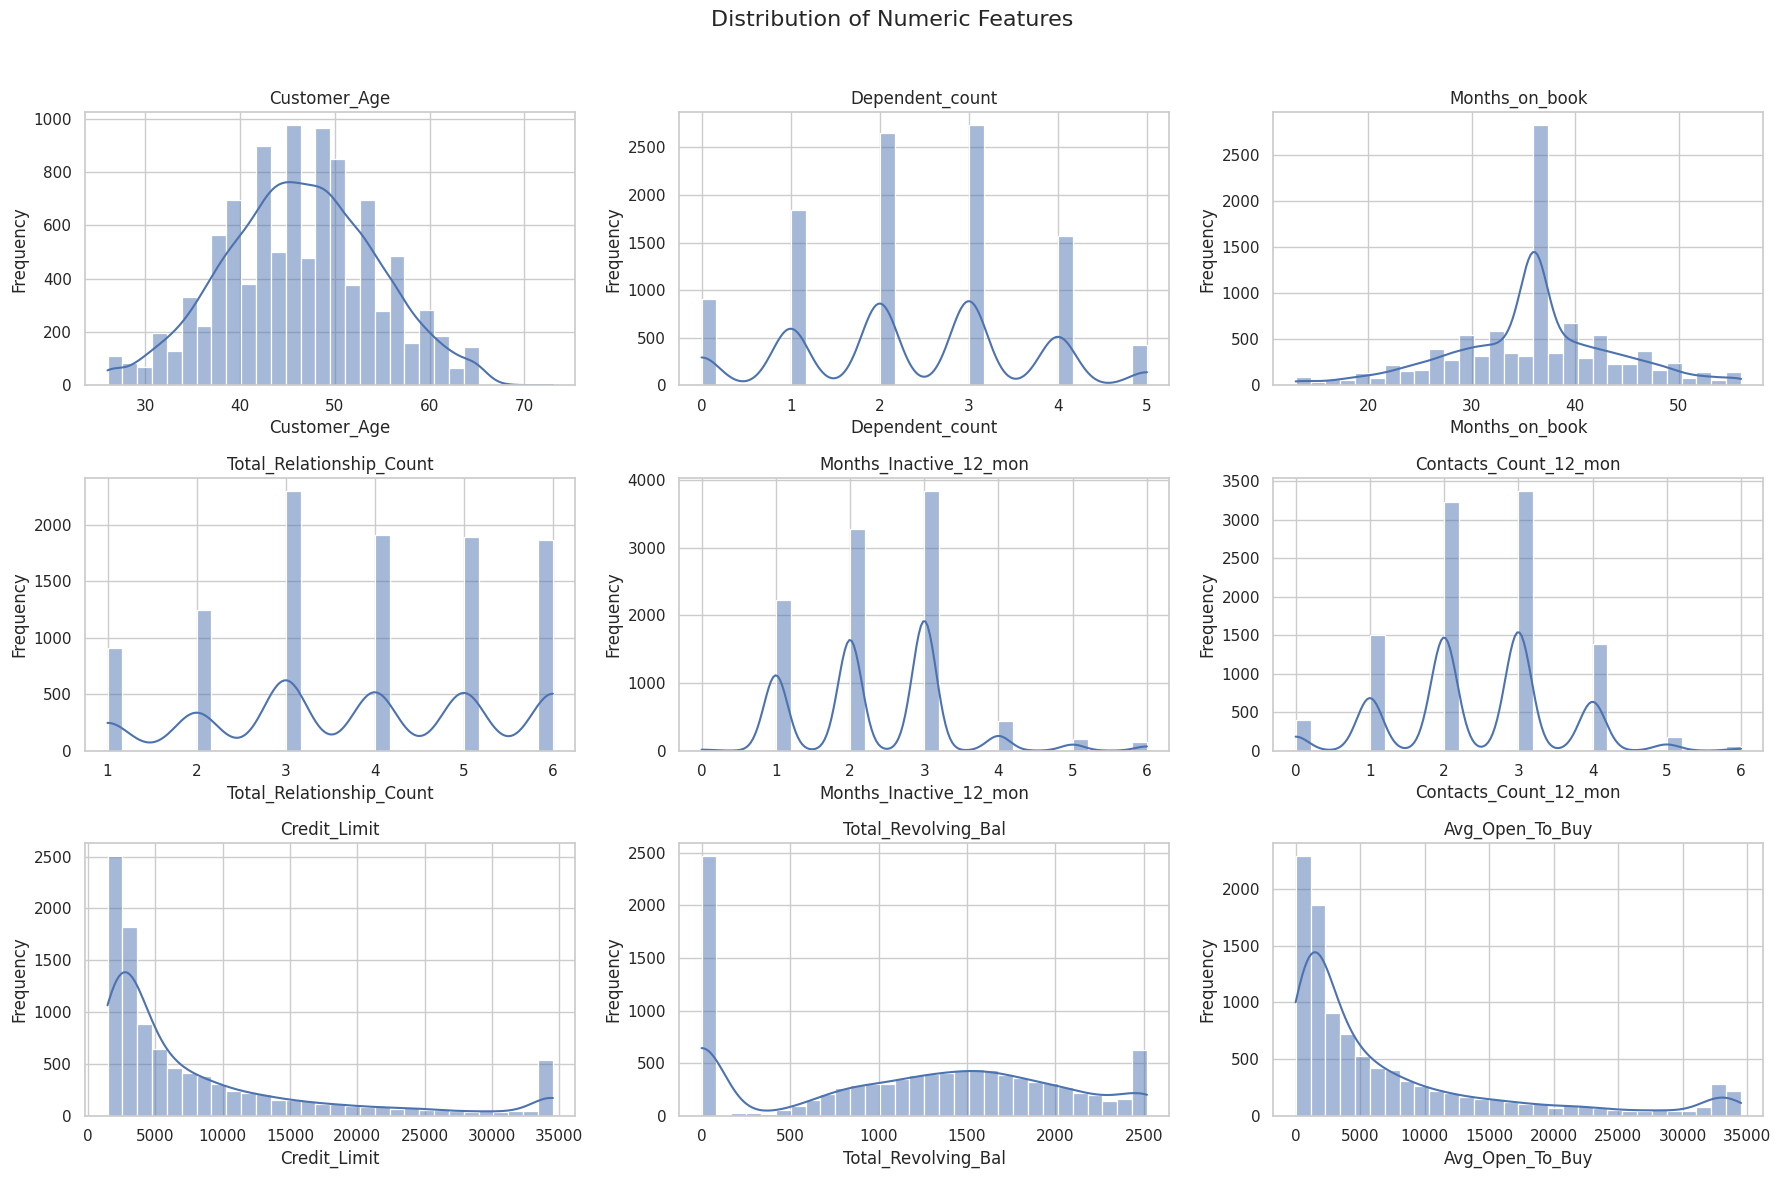

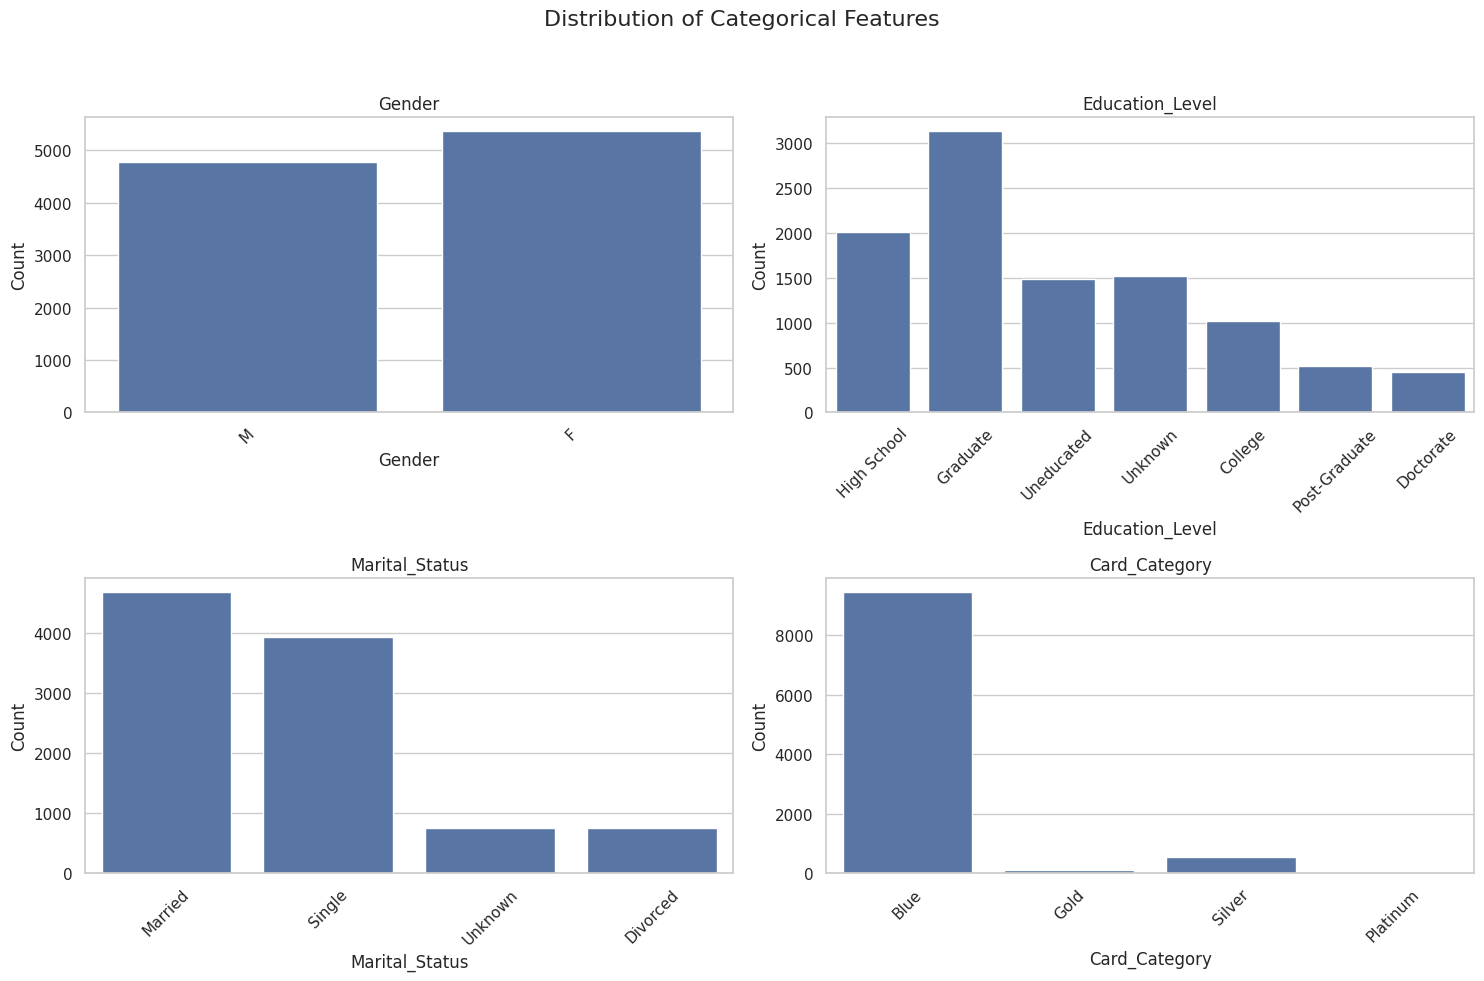

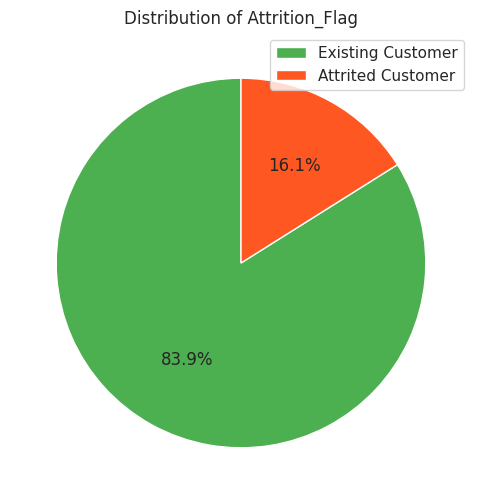

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Summary statistics of the numeric columns
summary_statistics = df.describe()

# Histograms for continuous variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Distribution of Numeric Features', fontsize=16)

numeric_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                   'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                   'Total_Revolving_Bal', 'Avg_Open_To_Buy']

for ax, column in zip(axes.flatten(), numeric_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Bar plot for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category']

for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Pie chart for the target variable 'Attrition_Flag'
plt.figure(figsize=(8, 6))
df['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                                                   colors=['#4CAF50', '#FF5722'], labels=None)
plt.title('Distribution of Attrition_Flag')
plt.legend(labels=df['Attrition_Flag'].value_counts().index, loc='upper right')
plt.ylabel('')

plt.show()

summary_statistics


Checking missing values and duplicates

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

missing_values, duplicate_rows


(Attrition_Flag              0
 Customer_Age                0
 Gender                      0
 Dependent_count             0
 Education_Level             0
 Marital_Status              0
 Income_Category             0
 Card_Category               0
 Months_on_book              0
 Total_Relationship_Count    0
 Months_Inactive_12_mon      0
 Contacts_Count_12_mon       0
 Credit_Limit                0
 Total_Revolving_Bal         0
 Avg_Open_To_Buy             0
 Total_Amt_Chng_Q4_Q1        0
 Total_Trans_Amt             0
 Total_Trans_Ct              0
 Total_Ct_Chng_Q4_Q1         0
 Avg_Utilization_Ratio       0
 dtype: int64,
 0)

Using Boxplot to check Outliers

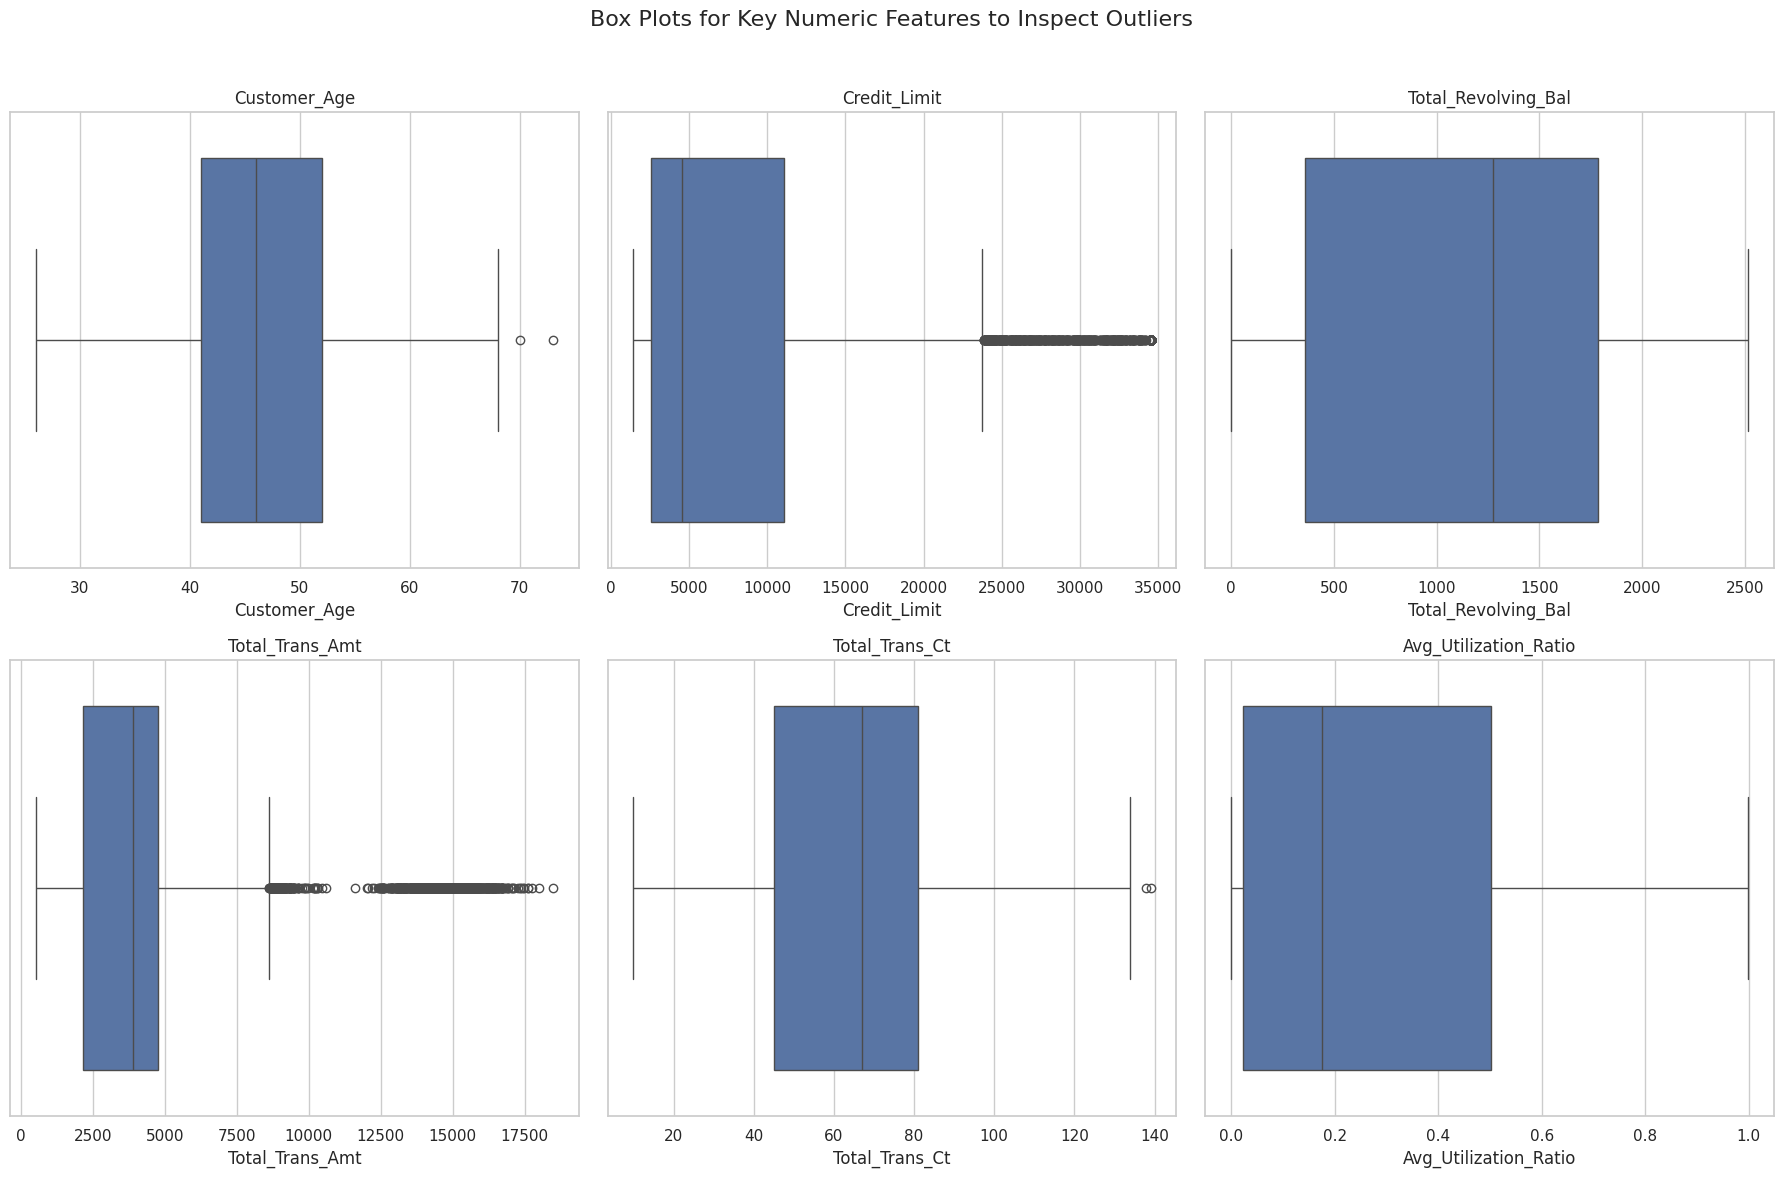

In [ ]:
# Box plots for key numeric features to inspect outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Box Plots for Key Numeric Features to Inspect Outliers', fontsize=16)

numeric_outlier_columns = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
                           'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

for ax, column in zip(axes.flatten(), numeric_outlier_columns):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Data type conversion - Converting categorical Variables into numerical variables

In [ ]:
# Encoding categorical variables using one-hot encoding
categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Display the first few rows of the encoded dataset
df.head()


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,False,False,False,False
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,False,True,False,False,False,True,False,False,False,False
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,False,False,False,False


Data Imbalancing

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the features and target variable
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the features and target variable
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
balanced_class_distribution = pd.Series(y_resampled).value_counts(normalize=True)

balanced_class_distribution



Attrition_Flag
Existing Customer    0.5
Attrited Customer    0.5
Name: proportion, dtype: float64

Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)




Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initializing the Logistic Regression model with default hyperparameters
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Training the model on the training dataset
log_reg_model.fit(X_train, y_train)

# Making predictions on the testing dataset
y_pred = log_reg_model.predict(X_test)

# Evaluating the model performance
accuracy_logistic = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy_logistic)
print(classification_rep)



0.8869693978282329
                   precision    recall  f1-score   support

Attrited Customer       0.74      0.47      0.57       327
Existing Customer       0.90      0.97      0.93      1699

         accuracy                           0.89      2026
        macro avg       0.82      0.72      0.75      2026
     weighted avg       0.88      0.89      0.88      2026



Hyper parameter tuning for Logistic regression model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Example dataset
data = load_iris()
X, y = data.data, data.target

# Setting up the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Setting up the model and GridSearchCV
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fitting GridSearchCV
grid_search.fit(X, y)

# Extracting the best parameters and best score
best_params_lr_adjusted = grid_search.best_params_
best_score_lr_adjusted = grid_search.best_score_

print("Best Parameters:", best_params_lr_adjusted)
print("Best Score:", best_score_lr_adjusted)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 10, 'solver': 'saga'}
Best Score: 0.9800000000000001


Ensamble Method - Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define the base models
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Creating the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Training the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred_stack = stacking_classifier.predict(X_test)

# Evaluating the model performance
stack_accuracy = accuracy_score(y_test, y_pred_stack)
stack_classification_rep = classification_report(y_test, y_pred_stack)

print(stack_accuracy)
print(stack_classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.932872655478776
                   precision    recall  f1-score   support

Attrited Customer       0.83      0.74      0.78       327
Existing Customer       0.95      0.97      0.96      1699

         accuracy                           0.93      2026
        macro avg       0.89      0.86      0.87      2026
     weighted avg       0.93      0.93      0.93      2026



Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model with default hyperparameters
random_forest_model = RandomForestClassifier(random_state=42)

# Training the model on the training dataset
random_forest_model.fit(X_train, y_train)

# Making predictions on the testing dataset
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the model performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_rep = classification_report(y_test, y_pred_rf)

print(rf_accuracy)
print(rf_classification_rep)


0.9536031589338598
                   precision    recall  f1-score   support

Attrited Customer       0.93      0.77      0.84       327
Existing Customer       0.96      0.99      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.94      0.88      0.91      2026
     weighted avg       0.95      0.95      0.95      2026



Hyper parameter tuning for random forest model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9559320050644251)

Support Vector Machine Model

In [ ]:
!pip install scikit-learn
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your features and target variable loaded from your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and train the SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Gradient Boosting Model

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your features and target variable loaded from your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and train the GBM
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)

# Evaluate the model
accuracy_GBM = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_GBM)
print("Classification Report:\n", classification_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Neural network Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your data into 'X' and 'y' here
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy_neural = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy_neural)


Epoch 1/50
3/3 [==============================] - 2s 308ms/step - loss: 0.6698 - accuracy: 0.4479 - val_loss: 0.5088 - val_accuracy: 0.3750
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 0.6109 - accuracy: 0.4583 - val_loss: 0.4462 - val_accuracy: 0.4583
Epoch 3/50
3/3 [==============================] - 0s 39ms/step - loss: 0.5677 - accuracy: 0.4688 - val_loss: 0.3813 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 35ms/step - loss: 0.4703 - accuracy: 0.4167 - val_loss: 0.3139 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 38ms/step - loss: 0.4548 - accuracy: 0.5000 - val_loss: 0.2458 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 85ms/step - loss: 0.3510 - accuracy: 0.5833 - val_loss: 0.1768 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 79ms/step - loss: 0.2673 - accuracy: 0.5833 - val_loss: 0.1037 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

Plotting the accuracy of the models

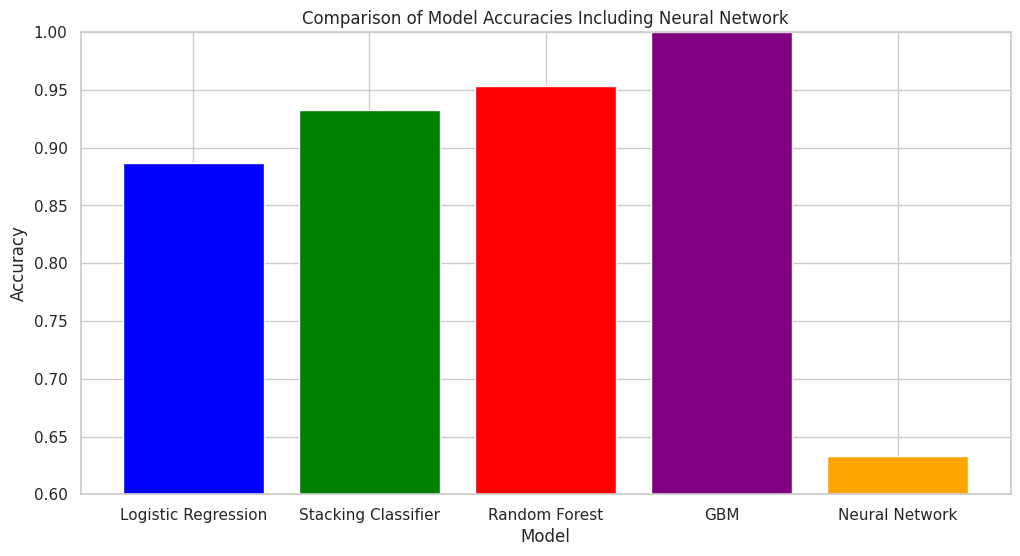

In [ ]:
import matplotlib.pyplot as plt

# Updated list of model names to include Neural Network
model_names = ['Logistic Regression', 'Stacking Classifier', 'Random Forest', 'GBM', 'Neural Network']

# Updated list of accuracies to include the provided Neural Network accuracy
accuracies = [accuracy_logistic, stack_accuracy, rf_accuracy, accuracy_GBM, test_accuracy_neural]

# Creating the updated bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])  # Added orange color for Neural Network
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Including Neural Network')
plt.ylim(0.6,1.0)  # Adjust as necessary to fit the range of your actual accuracies
plt.show()
